In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import animation
from scipy.optimize import dual_annealing
from scipy import optimize
from pyswarm import pso
import random

In [2]:
def fy(x_date):
    return np.piecewise(x,[x<-100,(x>=-100)&(x<=100),(x>100)],[lambda x:-100,lambda x:1/((x**2)-3*x+2),lambda x:100])

<function matplotlib.pyplot.show(close=None, block=None)>

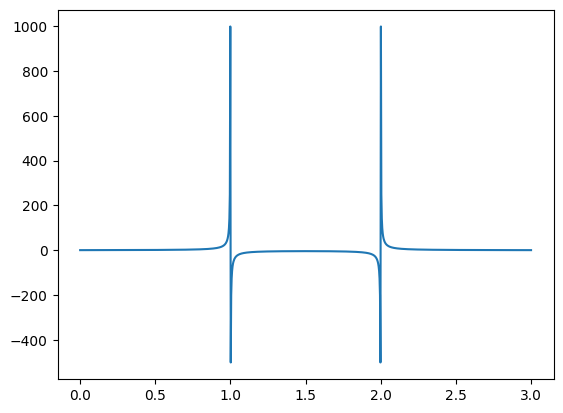

In [3]:
x_data=[]
y_data=[]
for k in range(0,1001):
    x=3*k/1000
    x_data.append(x)
    y = fy(x_data[k])
    y_data.append(y)
plt.plot(x_data, y_data)
plt.show

Generate the noisy data

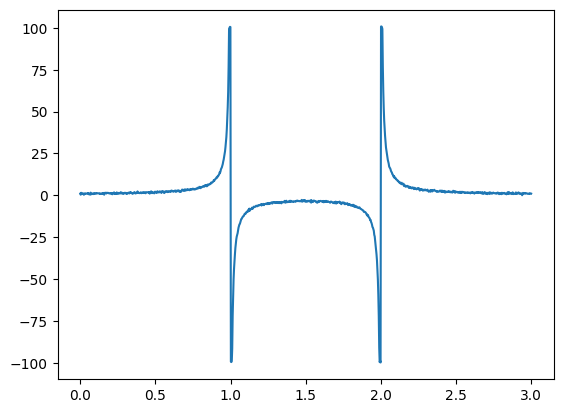

In [4]:
def f(x):
    return 1 / (x ** 2 - 3 * x + 2)

k = np.array([i for i in range(0,1001)])
x = 3 * k /1000
y = f(x)
for i in k:
    deta = np.random.normal(loc = 0.5, scale = 0.3)
    if y[i] < - 100:
        y[i] = -100 + deta
    else:
        if y[i] > 100:
            y[i] = 100 + deta
        else:
            y[i] += deta
plt.plot(x,y)

define rational function 

In [5]:
def rational_fun(x, vector):
    a,b,c,d=vector
    return (a * x + b) / (x ** 2 + c * x + d)

define error_funtion

In [6]:
def error_function(vector,fun,x,y):
    a,b,c,d=vector
    return np.sum((fun(x,vector)-y)**2)

In [7]:
epsi=0.001
lens = [3,3,3,3]

1.1Nelder-Mead Methods

Optimization terminated successfully.
         Current function value: 135679.375355
         Iterations: 327
         Function evaluations: 552
1 [-1.00063282  1.00112632 -2.00088158  1.00089771]


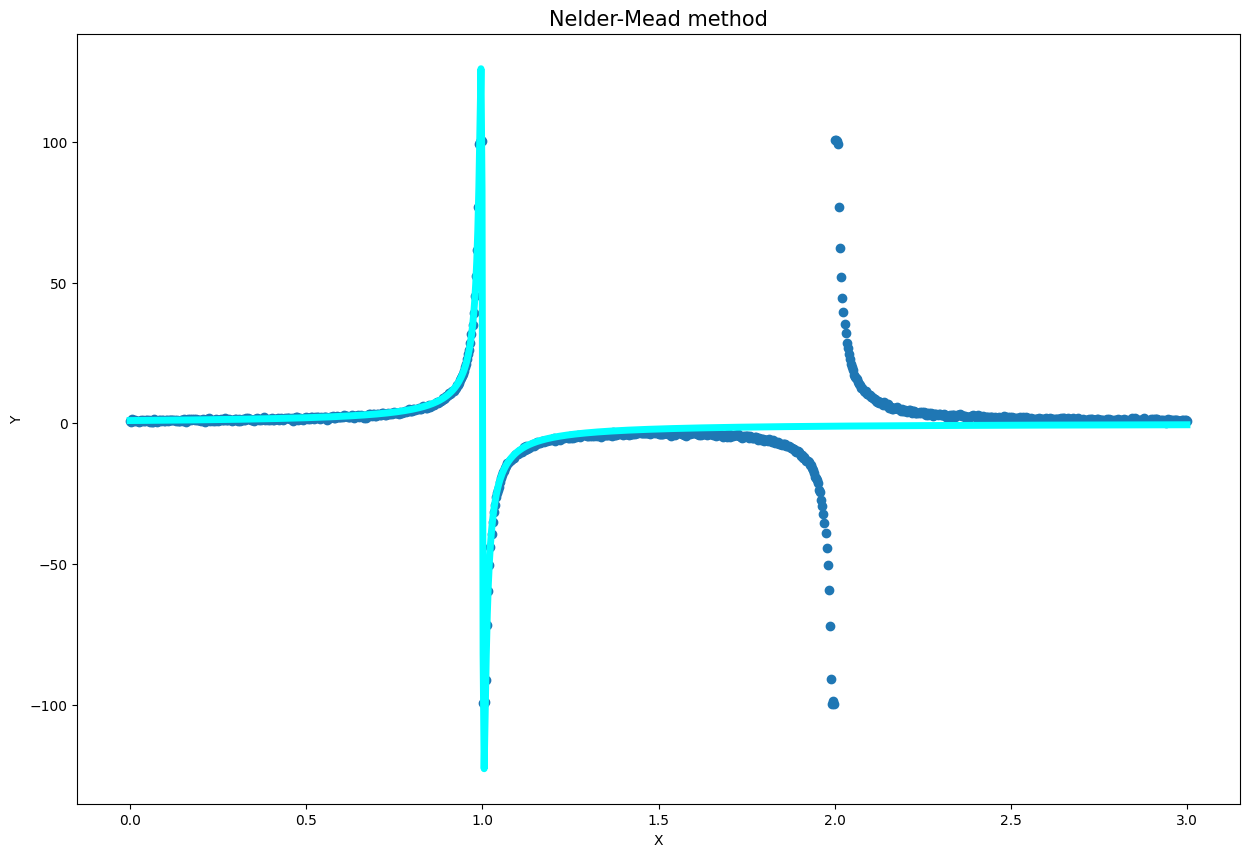

In [8]:
rs_nmm = optimize.minimize(error_function, lens, method='nelder-mead', args=(rational_fun,  x, y), options={'disp': True, 'maxiter': 1000, 'fatol': epsi})
plt.figure(figsize=(15,10))
plt.title("Nelder-Mead method", fontsize=15)
plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(x,y)
plt.plot(x,rational_fun(x, rs_nmm.x),'aqua', label="Nelder-Mead", linewidth=5)
print('1',rs_nmm.x)

1.2LMA

Optimization terminated successfully.
         Current function value: 135679.375355
         Iterations: 327
         Function evaluations: 552
[-1.00063282  1.00112632 -2.00088158  1.00089771]


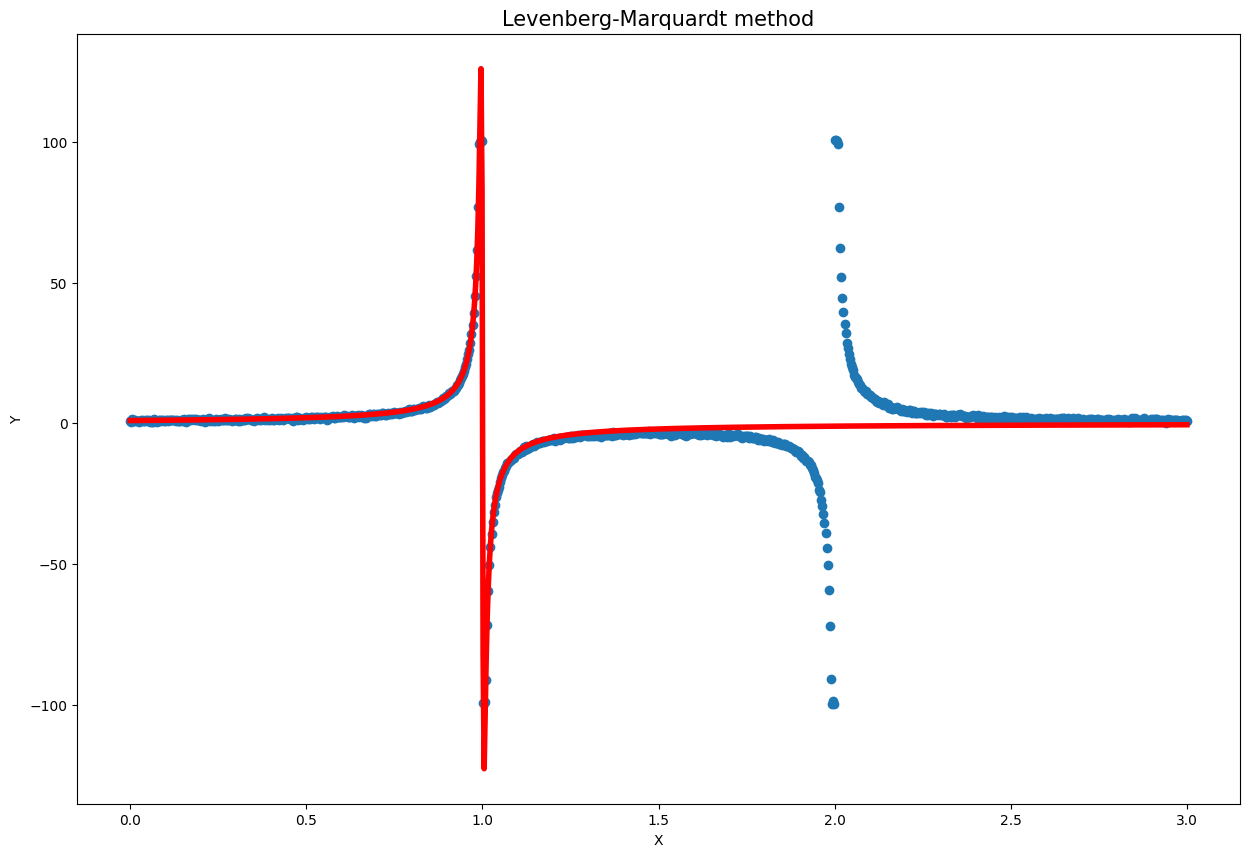

In [9]:
rs_lmm = optimize.minimize(error_function, lens, method='nelder-mead', args=(rational_fun,  x, y), options={'disp': True, 'maxiter': 1000, 'fatol': epsi})
plt.figure(figsize=(15,10))
plt.title("Levenberg-Marquardt method", fontsize=15)
plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(x,y)
plt.plot(x,rational_fun(x, rs_lmm.x),'red', label="Nelder-Mead", linewidth=4)
print(rs_lmm.x)

1.3Simulated Annealing method

[-1.0004485   1.00094179 -2.00088185  1.00089796]


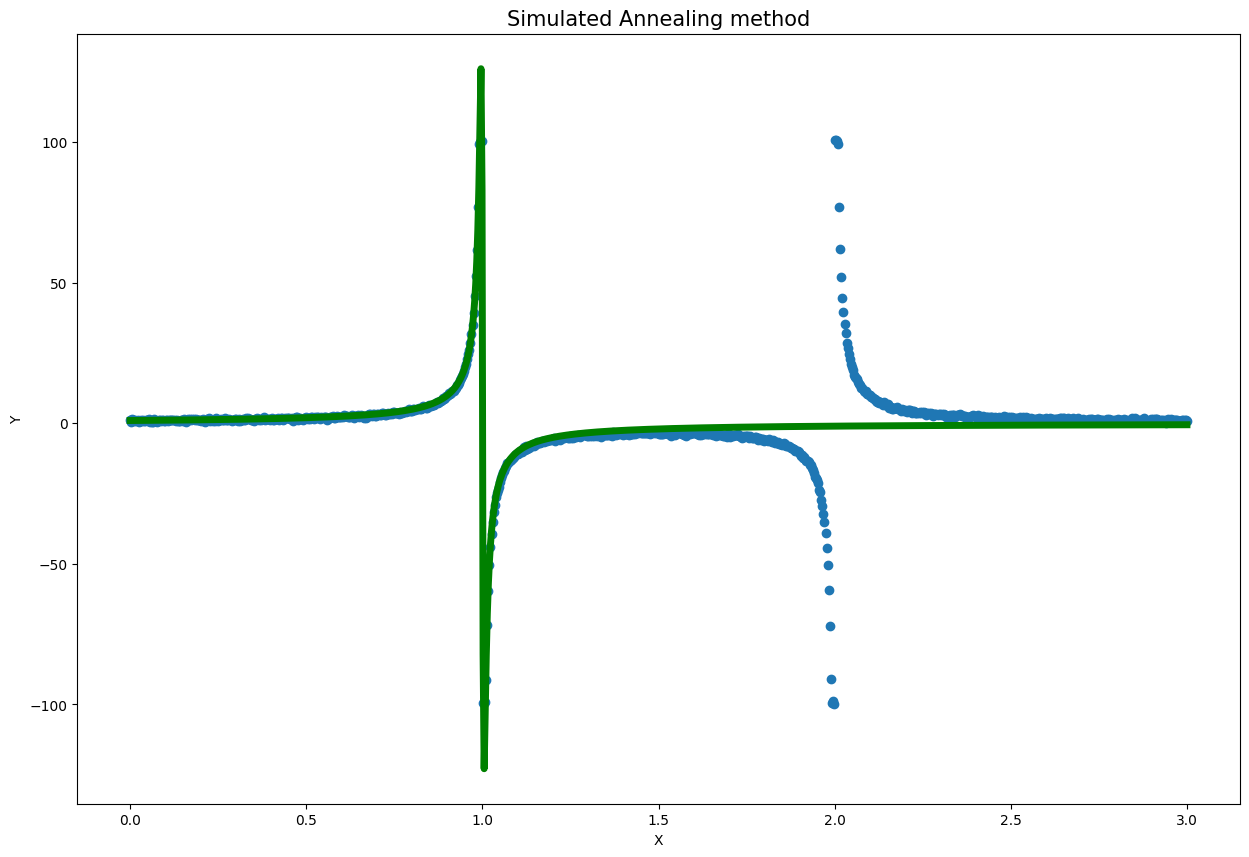

In [10]:
bounds = [(-3,3),(-3,3),(-3,3),(-3,3)]
rs_sa = dual_annealing(error_function, bounds, args=(rational_fun,  x, y))
plt.figure(figsize=(15,10))
plt.title("Simulated Annealing method", fontsize=15)
plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(x,y)
plt.plot(x,rational_fun(x, rs_sa.x),'green', label="Simulated Annealing method", linewidth=5)
print(rs_sa.x)

1.4Particle swarm method

Stopping search: Swarm best objective change less than 0.001
[-309.67732818  519.15607957 -398.76070789  793.32354131]


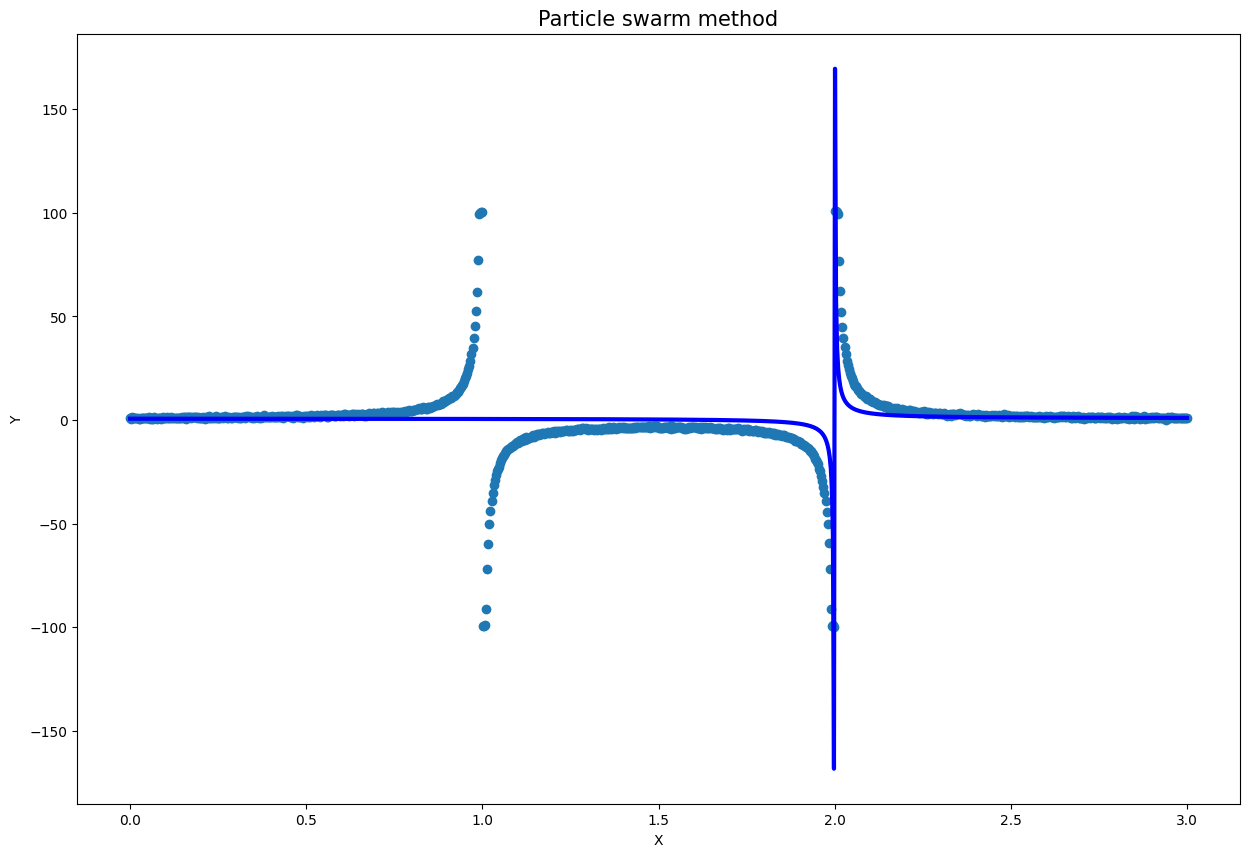

In [11]:
ub = [1000,1000,1000,1000]
lb = [-1000,-1000,-1000,-1000]
xopt = pso(error_function, lb, ub, maxiter=1000, args=(rational_fun, x, y), swarmsize=1000, minfunc=epsi)
plt.figure(figsize=(15,10))
plt.title("Particle swarm method", fontsize=15)
plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(x,y)
plt.plot(x,rational_fun(x, xopt[0]),'blue', label="Particle swarm method", linewidth=3)
print(xopt[0])

1.5 Differential Evolution method

[-1.00309618  1.00357255 -2.0008414   1.00085759]


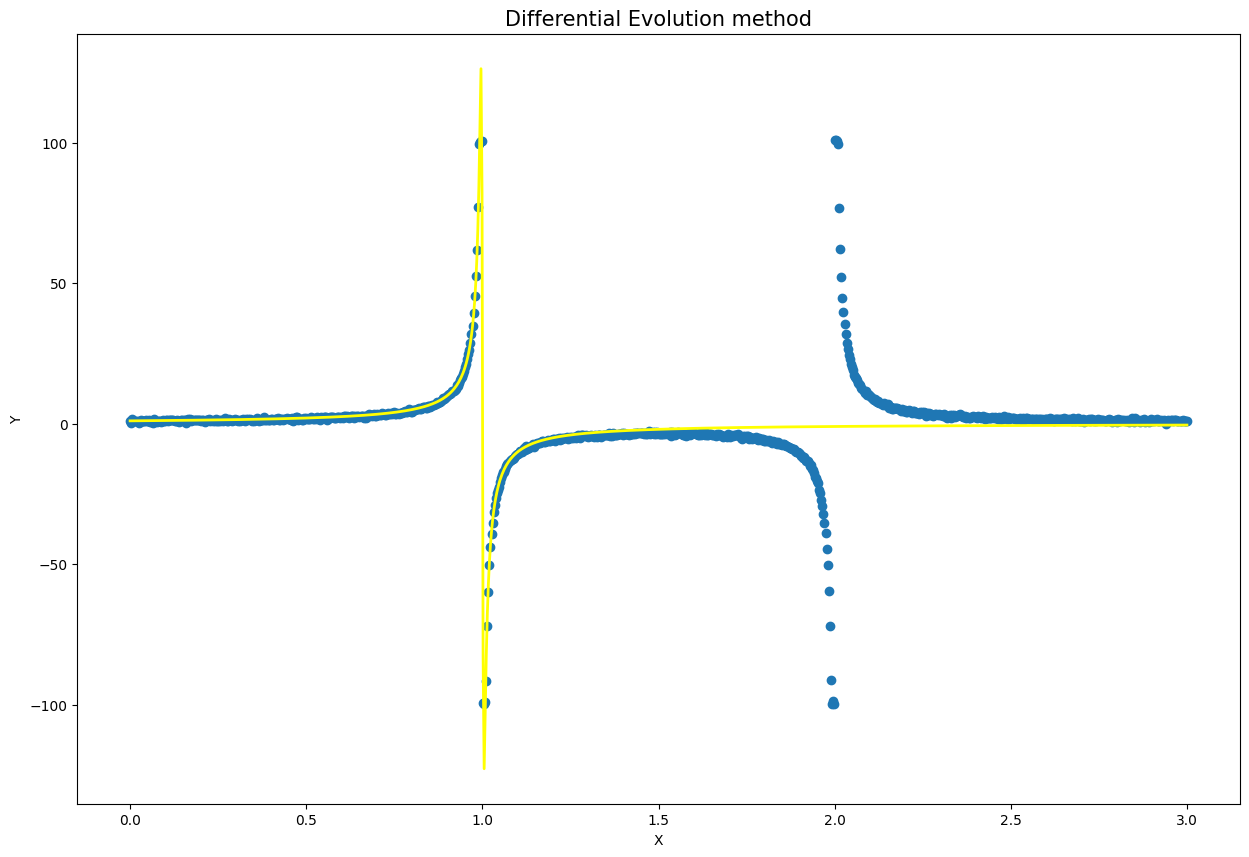

In [12]:
bounds = np.array([[-3, 3], [-3, 3], [-3, 3], [-3, 3]])
rs_de = optimize.differential_evolution(error_function, bounds, args=(rational_fun, x, y), tol=epsi)
plt.figure(figsize=(15,10))
plt.title("Differential Evolution method", fontsize=15)
plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(x,y)
plt.plot(x,rational_fun(x, rs_de.x),'yellow', label="Differential Evolution method", linewidth=2)
print(rs_de.x)

1.6 Comparion

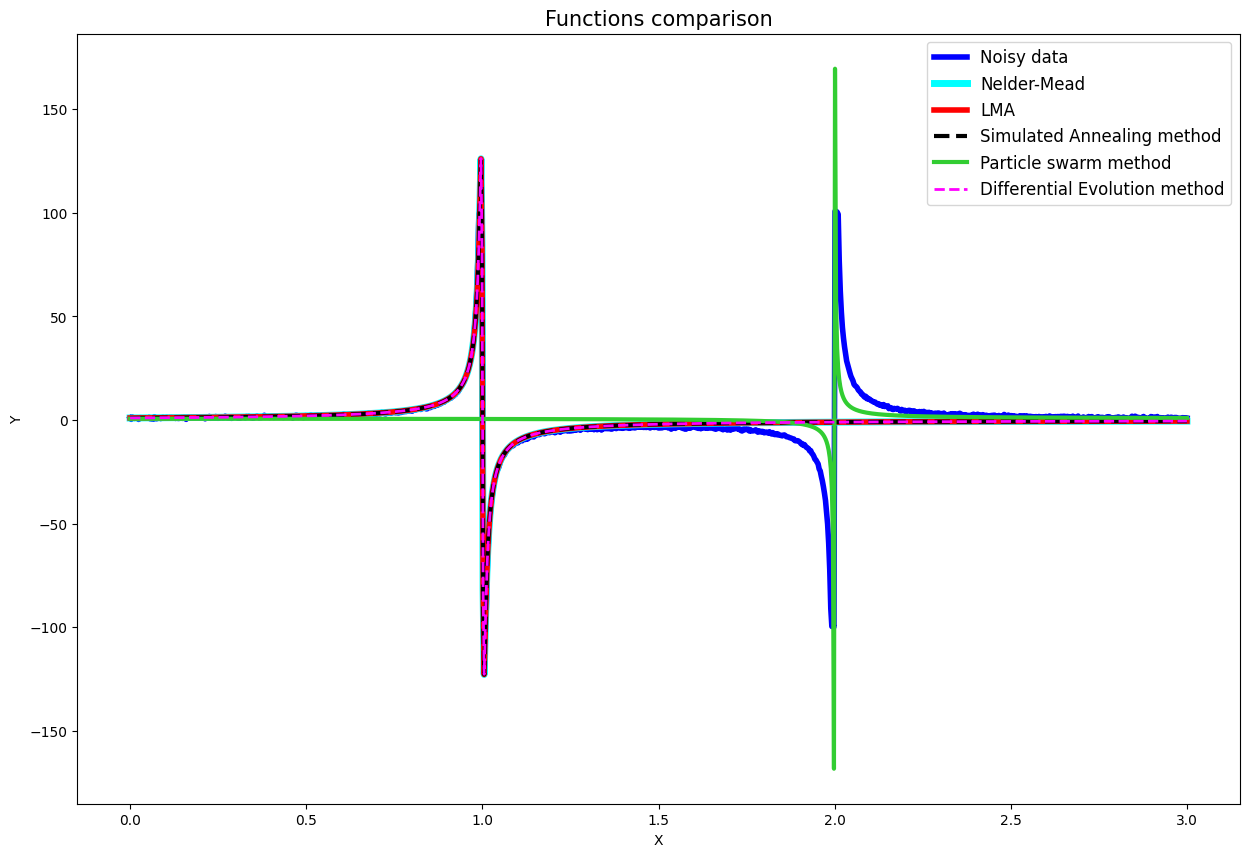

In [13]:
plt.figure(figsize=(15,10))
plt.title("Functions comparison", fontsize=15)
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(x, y, 'b', label="Noisy data", linestyle = '-', linewidth=4)
plt.plot(x,rational_fun(x, rs_nmm.x),'aqua', label="Nelder-Mead", linewidth=5)
plt.plot(x,rational_fun(x, rs_lmm.x),'red', label="LMA", linewidth=4)
plt.plot(x,rational_fun(x, rs_sa.x),'black', label="Simulated Annealing method", linestyle = '--',linewidth=3)
plt.plot(x,rational_fun(x, xopt[0]),'limegreen', label="Particle swarm method", linewidth=3)
plt.plot(x,rational_fun(x, rs_de.x),'magenta', label="Differential Evolution method", linestyle = '--', linewidth=2)
plt.legend(fontsize=12)

In [14]:
df = pd.read_csv('data.csv')
df

,name,state,x,y
0,Abilene,TX,-6890.91,2242.06
1,Akron,OH,-5632.62,2838.55
2,Albany,NY,-5096.27,2947.10
3,Albuquerque,NM,-7369.09,2424.18
4,Yuma,AZ,-7919.99,2261.17
5,Allentown,PA,-5216.07,2805.86
6,Amarillo,TX,-7036.07,2433.68
7,Yakima,WA,-8326.35,3220.01
8,Ann Arbor,MI,-5785.13,2920.73
9,Asheville,NC,-5704.14,2459.86


In [15]:
def x_y(df):
    coordinates = []
    for index in range(len(df)):
        coordinate = [df.loc[index, 'x'], df.loc[index, 'y']]
        coordinates.append(coordinate)
    return coordinates

def plot(path, points, df, title):
    plt.figure(figsize=(20, 10))
    ax = plt.gca()
    
    x = []
    y = []
    for index, data in enumerate(path[0]):
        x.append(points[data][0])
        y.append(points[data][1])

    ax.scatter(x, y, s=50, c='black')
    plt.arrow(x[-1], y[-1], (x[0]-x[-1]), (y[0]-y[-1]),
              head_width=50, color ='magenta', length_includes_head=True)
    
    for i in range(0, len(x)-1):
        plt.arrow(x[i], y[i], (x[i+1]-x[i]), (y[i+1]-y[i]),
                  head_width=50, color='magenta', length_includes_head=True)
    
    ax.set_title(title,fontweight="bold")
    
    plt.show()

In [16]:
class Annealing(object):
    def __init__(self, coordinates, T=-1, alpha=-1, stopping_T=-1, stopping_iter=-1, path=df):
        self.coordinates = coordinates
        self.N = len(coordinates)
        self.T = np.sqrt(self.N) if T == -1 else T
        self.T_save = self.T
        self.alpha = 0.995 if alpha == -1 else alpha
        self.stopping_temperature = 1e-6 if stopping_T == -1 else stopping_T
        self.stopping_iter = 1000000 if stopping_iter == -1 else stopping_iter
        self.iteration = 1
        self.path = path
        
        self.nodes = [i for i in range(self.N)]
        
        self.best_solution = None
        self.best_fitness = float('Inf')
        self.fitness_list = []
    
    def initial_solution(self):
        cur_node = random.choice(self.nodes)
        solution = [cur_node]
        
        free_nodes = set(self.nodes)
        free_nodes.remove(cur_node)
        while free_nodes:
            next_node = min(free_nodes, key=lambda x: self.dist(cur_node, x))
            free_nodes.remove(next_node)
            solution.append(next_node)
            cur_node = next_node
        
        cur_fit = self.fitness(solution)
        if cur_fit < self.best_fitness:
            self.best_fitness = cur_fit
            self.best_solution = solution
        self.fitness_list.append(cur_fit)
        return solution, cur_fit
    
    def dist(self, node_0, node_1):
        coord_0, coord_1 = self.coordinates[node_0], self.coordinates[node_1]
        return np.sqrt((coord_0[0] - coord_1[0]) ** 2 + (coord_0[1] - coord_1[1]) ** 2)
    
    def fitness(self, solution):
        cur_fit = 0
        for i in range(self.N):
            cur_fit = cur_fit + self.dist(solution[i % self.N], solution[(i + 1) % self.N])
        return cur_fit
    
    def p_accept(self, candidate_fitness):
        return np.exp(-abs(candidate_fitness - self.cur_fitness) / self.T)
    
    def accept(self, candidate):
        candidate_fitness = self.fitness(candidate)
        
        if candidate_fitness < self.cur_fitness:
            self.cur_fitness, self.cur_solution = candidate_fitness, candidate
            if candidate_fitness < self.best_fitness:
                self.best_fitness, self.best_solution = candidate_fitness, candidate
        else:
            if random.random() < self.p_accept(candidate_fitness):
                self.cur_fitness, self.cur_solution = candidate_fitness, candidate
    
    def anneal(self):
        self.cur_solution, self.cur_fitness = self.initial_solution()
        
        print('First Iteration:', self.best_fitness)
        plot([self.cur_solution], self.coordinates, self.path,'First Iteration')
        
        while self.T >= self.stopping_temperature and self.iteration < self.stopping_iter:
            candidate = list(self.cur_solution)
            l = random.randint(2, self.N - 1)
            i = random.randint(0, self.N - l)
            candidate[i : (i + l)] = reversed(candidate[i : (i + l)])
            self.accept(candidate)
            self.T = self.T * self.alpha
            self.iteration = self.iteration + 1
            
            self.fitness_list.append(self.cur_fitness)
        
        print('Last Iteration:', self.best_fitness)
        plot([self.best_solution], self.coordinates, self.path,'Last Iteration')

First Iteration: 13452.60508211834


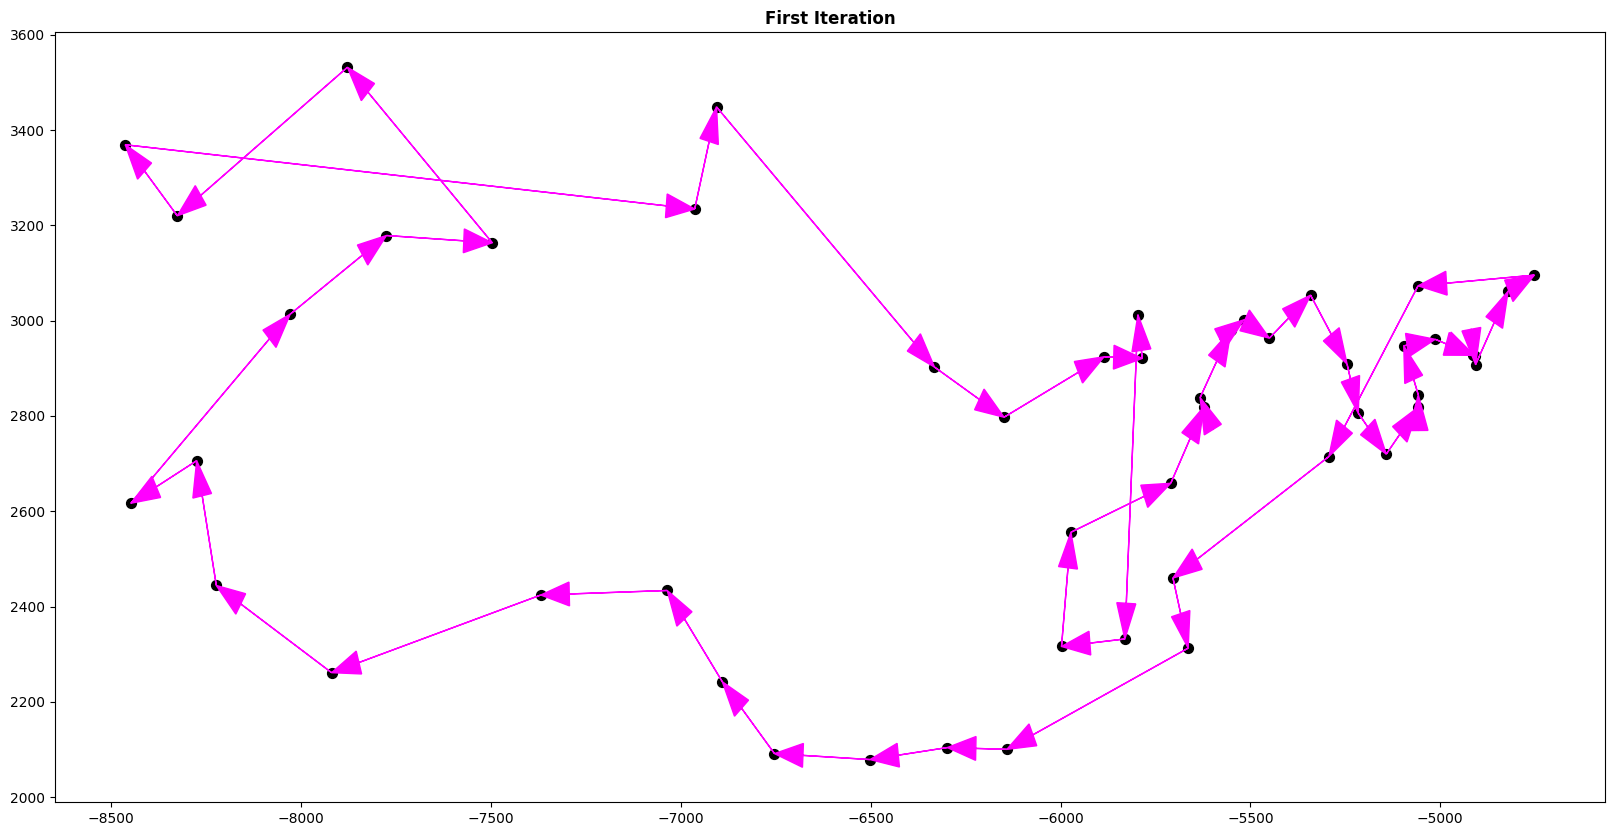

Last Iteration: 11857.775343549558


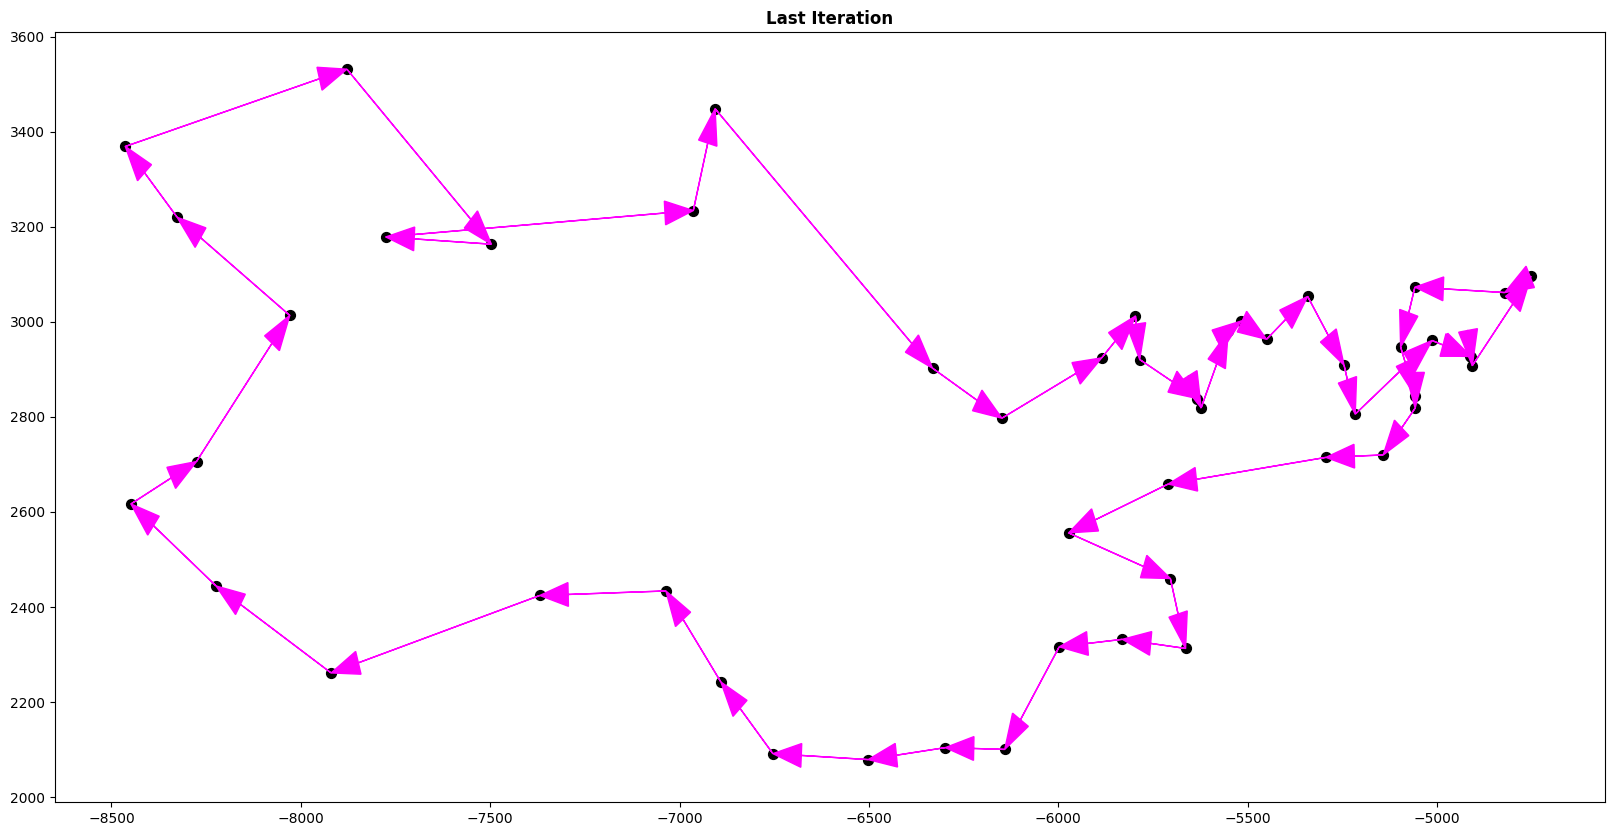

In [17]:
task4_2 = Annealing(coordinates=x_y(df), stopping_iter=1000000, path=df)
task4_2.anneal()